In [2]:
import numpy as np
import matplotlib.pyplot as plt

l2 distance with uniform: 14.513643681909612
l2 distance with Log2: 20.20386267775388


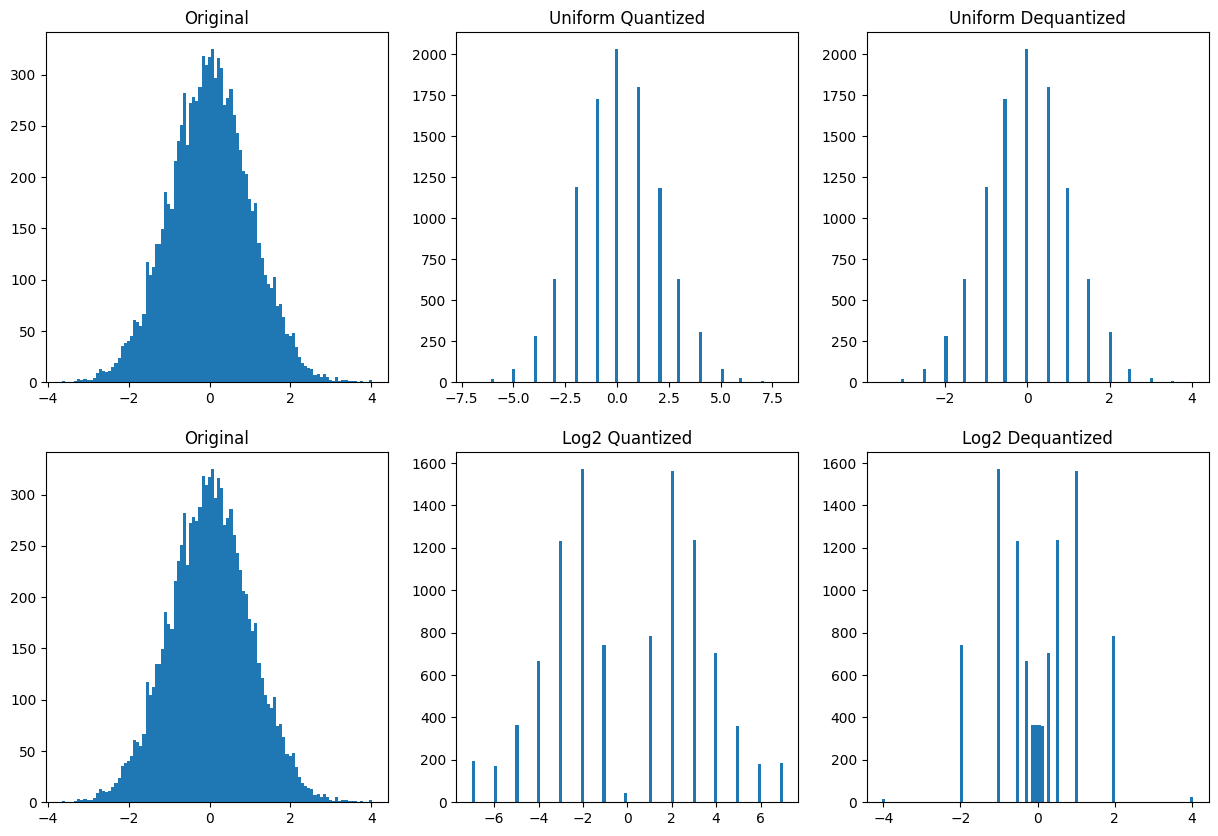

In [53]:
np.random.seed(1)
x = np.random.normal(0, 1, 10000)

def UniformQuant(input, bits=4):
    x_max = np.max(np.abs(input))

    # Quantization step
    step = x_max / 2 ** (bits - 1)
    x_q = np.round(input / step)

    # Dequantization
    x_hat = step * x_q

    return x_q, x_hat

def Log2Quant(input, bits=4):
    x_max = np.max(np.abs(input))

    # Quantization step
    sign = np.sign(input)

    x = -np.round(np.log2(np.abs(input) / x_max))
    x_q = sign * np.clip(x, 0, 2 ** (bits - 1) - 1)

    # Dequantization
    x_hat = sign * x_max / 2 ** (np.abs(x_q))

    return x_q, x_hat

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
x_q, x_hat = UniformQuant(x, 4)
axes[0, 0].hist(x, bins=100)
axes[0, 0].set_title("Original")
axes[0, 1].hist(x_q, bins=100)
axes[0, 1].set_title("Uniform Quantized")
axes[0, 2].hist(x_hat, bins=100)
axes[0, 2].set_title("Uniform Dequantized")


print(f"l2 distance with uniform: {np.linalg.norm(x - x_hat)}")


x_q, x_hat = Log2Quant(x, 4)
axes[1, 0].hist(x, bins=100)
axes[1, 0].set_title("Original")
axes[1, 1].hist(x_q, bins=100)
axes[1, 1].set_title("Log2 Quantized")
axes[1, 2].hist(x_hat, bins=100)
axes[1, 2].set_title("Log2 Dequantized")
print(f"l2 distance with Log2: {np.linalg.norm(x - x_hat)}")